# 📑 Table of Contents

1. [🔧 Preparing the Data](#0-preparing-the-data)
   - Data loading and inspection
   - Data type conversions
   - Quality checks

2. [📌 Business Objective](#1-business-objective)
   - Key questions
   - Analysis goals

3. [📊 Exploratory Data Analysis (EDA)](#2-exploratory-data-analysis-eda)
   - Churn analysis by gender
   - Age distribution
   - Income vs spending patterns
   - Membership level analysis
   - Purchase frequency impact

4. [💁 Customer Segmentation](#3-customer-segmentation)
   - K-means clustering
   - Segment analysis
   - Key insights

In [ ]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
customers_data= pd.read_csv("customer_data_with_churn.csv")

# 🔧0. Preparing the data
In this section, the presence of missing values and duplicate lines will be checked. Then, we will convert columns into different data types.

*Note*: this section presents data transformations and python code used to process the data. Readers not interested in these technical details can jump ahead to the next section of this report.

In [2]:
# Check for missing values and data types
print(customers_data.head())
print(customers_data.describe())
customers_data.info()

  CustomerID              Name  Age  Gender  Annual_Income  Spending_Score  \
0   CUST1000    Connor Rowland   40  Female          52777              27   
1   CUST1001  Cameron Miles MD   28  Female          65910              84   
2   CUST1002      Dennis Price   63    Male          56731              51   
3   CUST1003     Jessica Jones   23  Female          40559              56   
4   CUST1004       Kevin Bauer   38    Male          79675              74   

  Membership_Level  Purchase_Frequency  Churn_Status  
0             Gold                 5.2             0  
1            Basic                12.2             0  
2           Silver                 2.9             1  
3         Platinum                11.1             0  
4            Basic                10.7             0  
              Age  Annual_Income  Spending_Score  Purchase_Frequency  \
count  2000.00000    2000.000000     2000.000000         2000.000000   
mean     43.57150   59849.506000       50.469500         

In [3]:
# Check for duplicates
customers_data.duplicated().any()

False

In [4]:
def convert_column_type(column_name, new_type):
    """
    Convert a single column of the global `customers_data` DataFrame to a new dtype in-place.

    Parameters
    ----------
    column_name : str
        Name of the column in `customers_data` to convert.
    new_type : str or dtype
        Target dtype (e.g., 'category', 'float', 'boolean', numpy dtype, pandas dtype).

    Notes
    -----
    This function modifies `customers_data` in-place and uses `astype(..., copy=False)`
    to avoid unnecessary copies when possible.
    """
    customers_data[column_name] = customers_data[column_name].astype(new_type, copy=False)

In [5]:
# Convert multiple columns
for col, dtype in [
    ('Gender', 'category'),
    ('Membership_Level', 'category'),
    ('Churn_Status', 'boolean'),
    ('Annual_Income', 'float')
]:
    convert_column_type(col, dtype)

# Check data types conversion
assert customers_data['Gender'].dtype == 'category'
assert customers_data['Membership_Level'].dtype == 'category'
assert customers_data['Churn_Status'].dtype == 'boolean'
assert customers_data['Annual_Income'].dtype == "float"


# 📌 1. Business Objective
Identify customer segments to help improve retention strategies in a banking context.  
**Key Questions to Answer:**

- What customer profiles are most likely to churn?
- How do income, spending score, and membership level relate to churn?
- Which segments are most valuable and loyal?

# 📊 2. Exploratory Data Analysis (EDA)
In this section, we will create different graphs to help us answer certain questions.

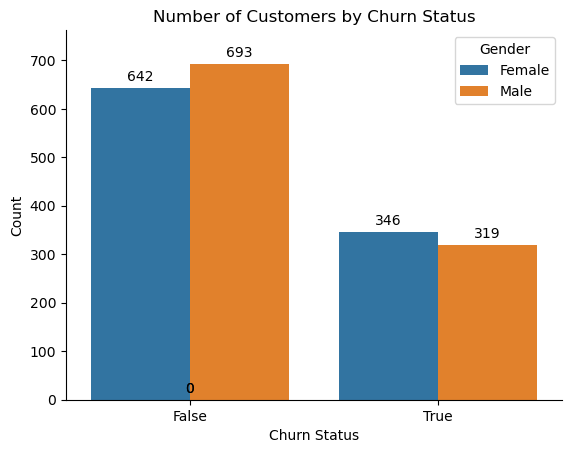

In [6]:
ax = sns.countplot(data=customers_data, x='Churn_Status', hue="Gender")
maxh = max(p.get_height() for p in ax.patches)
for p in ax.patches:
    h = p.get_height()
    ax.annotate(f'{int(h)}', 
                xy=(p.get_x() + p.get_width() / 2, h),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)
plt.title('Number of Customers by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Count')
plt.ylim(0, maxh * 1.10)  # give space for the labels
sns.despine() 
plt.show()

It looks the churn rate represents about a one third of customers and females have a slightly higher churn rate than males. This might suggest differences in satisfaction, engagement, or service fit by gender.

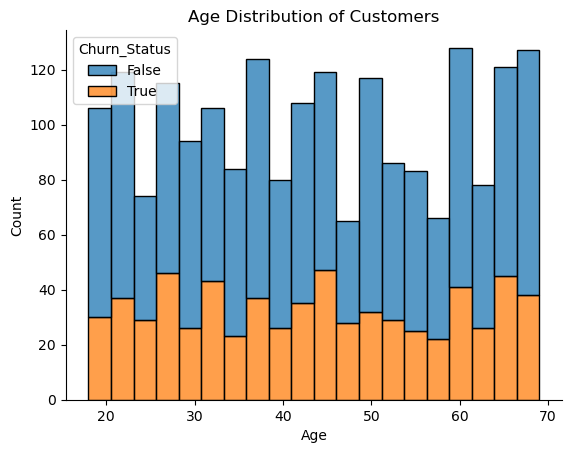

In [7]:
sns.histplot(data=customers_data, x='Age', bins=20, hue='Churn_Status', multiple='stack')
plt.title('Age Distribution of Customers')
sns.despine()                                                               
plt.show()

There isn’t a single age segment completely safe from churn. So churn management should be broad-based, not limited to one age demographic.

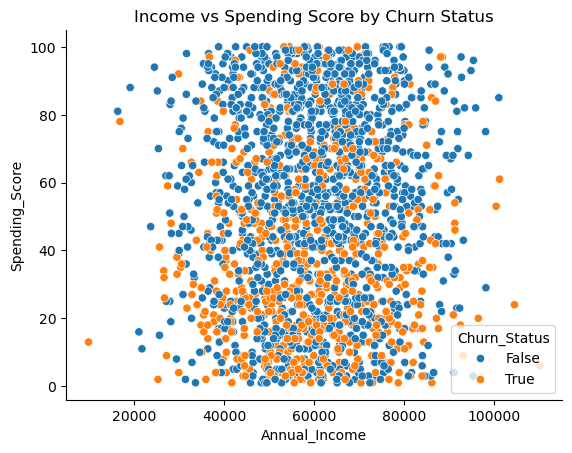

In [8]:
sns.scatterplot(data=customers_data, x='Annual_Income', y='Spending_Score', hue='Churn_Status')
plt.title('Income vs Spending Score by Churn Status')
sns.despine() 
plt.show()

Apparently, there is no clear correlation between the annuel income and the spending score. Moreover, income alone doesn’t strongly predict churn. It occurs at all income levels.  
Customers who spend less are more likely to churn, possibly because they’re less engaged or don’t see strong value in the service. An action idea could be focused on increasing engagement and perceived value for low-spending customers through rewards, personalized offers, or usage-based incentives.

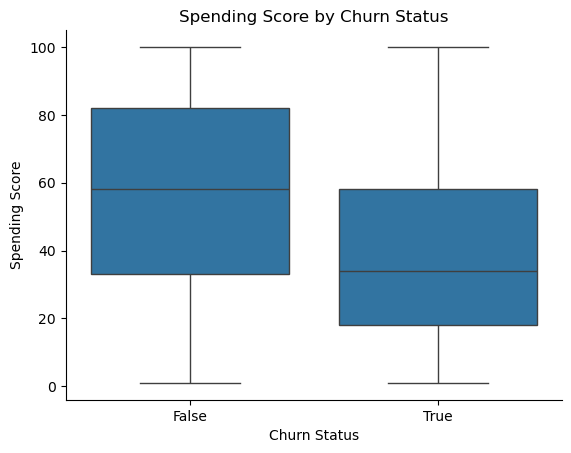

In [9]:
sns.boxplot(data=customers_data, x='Churn_Status', y='Spending_Score')
plt.title('Spending Score by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Spending Score')
sns.despine()
plt.show()

The boxplot confirms what we've seen previously: customers with low spending score has higher churn rate.

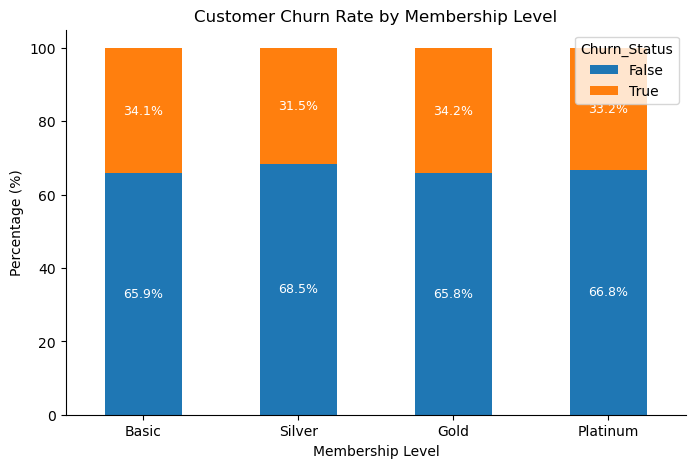

In [ ]:
# Create ordered categorical
customers_data['Membership_Level'] = pd.Categorical(
    customers_data['Membership_Level'],
    categories=['Basic', 'Silver', 'Gold', 'Platinum'],
    ordered=True
)

# Calculate percentages
percentages = (counts.div(counts.sum(axis=1), axis=0) * 100).round(1)

# Create stacked bar plot with percentages
ax = percentages.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Customer Churn Rate by Membership Level')
plt.xlabel('Membership Level')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
sns.despine()

# Add percentage labels in the center of each segment
for i in range(len(percentages.index)):
    cumsum = 0
    for j in range(len(percentages.columns)):
        height = percentages.iloc[i, j]
        if height > 0:
            ax.text(i, cumsum + height/2, f'{height:.1f}%',
                   ha='center', va='center', color='white', fontsize=9)
        cumsum += height

plt.legend(title='Churn_Status')
plt.show()

The percentage of churn rate is quite constant accross the merbership level.

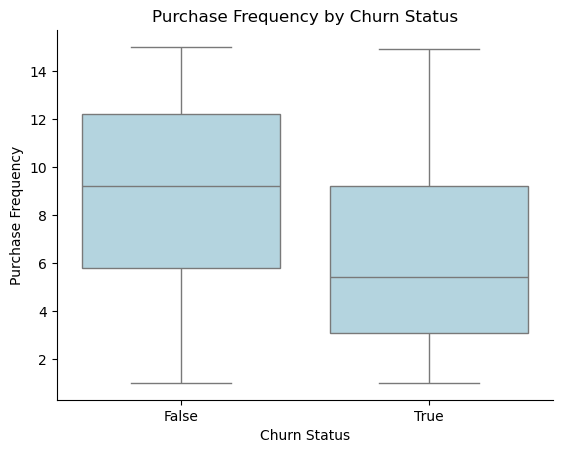

In [10]:
sns.boxplot(data=customers_data, x='Churn_Status', y='Purchase_Frequency', color='lightblue')
plt.title('Purchase Frequency by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Purchase Frequency')
sns.despine()
plt.show()

Here, we observe something similar to the boxplot with "spending_score". Purchase frequency is strongly linked to churn: customers who buy less often are more likely to leave.  
This suggests engagement is a key retention driver. Customers who interact frequently with the bank (e.g., through transactions or product usage) are less likely to churn.

# 💁 3. Customer segmentation

In [12]:
# Select features for clustering
features = customers_data[['Annual_Income', 'Spending_Score', 'Purchase_Frequency']]
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)    

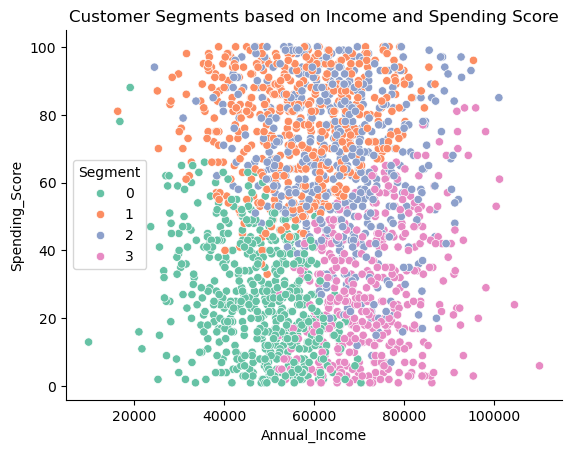

In [13]:
# Choose the number of clusters (k)
kmeans= KMeans(n_clusters=4, random_state=42)
customers_data["Segment"]=kmeans.fit_predict(scaled_features)

sns.scatterplot(data=customers_data, x='Annual_Income', y='Spending_Score', hue='Segment', palette='Set2')
plt.title('Customer Segments based on Income and Spending Score')
sns.despine()
plt.show()

## 💡 Key Insights:

1. **Income ≠ Spending**: High income doesn't guarantee high spending (see Segment 3)
2. **Sweet Spot**: Segment 1 (orange) represents your ideal customers - engaged despite varying income levels
3. **Opportunity**: Segment 2 (blue) has untapped potential given their high income
4. **Risk**: Segment 3 (pink) likely has the highest churn rate - low engagement despite resources

Thanks to this segmentation wen can tailor the marketing strategies, retention efforts, and product offerings to each group's unique characteristics!